In [206]:
from os.path import join
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [207]:
#Data import
df = pd.read_csv(join('data', 'winequality_red.csv'),sep=';')

df.describe()
df.head(10)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
5,7.4,0.66,0.00,1.8,0.075,13.0,40.0,0.9978,3.51,0.56,9.4,5
6,7.9,0.60,0.06,1.6,0.069,15.0,59.0,0.9964,3.30,0.46,9.4,5
7,7.3,0.65,0.00,1.2,0.065,15.0,21.0,0.9946,3.39,0.47,10.0,7
8,7.8,0.58,0.02,2.0,0.073,9.0,18.0,0.9968,3.36,0.57,9.5,7
9,7.5,0.50,0.36,6.1,0.071,17.0,102.0,0.9978,3.35,0.80,10.5,5


In [233]:
from sklearn.model_selection import train_test_split
# 첫번째 매개변수는 trnx,tstx 두번째 매개변수는 레이블(trny, tsty)
trnx, tstx, trny, tsty = train_test_split(df.iloc[:,10:11], df.iloc[:,11], test_size=0.3, random_state=123)

In [234]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X=trnx, y=trny)
lr_pred = model.predict(X=tstx)
print(lr_pred)

[6.32490817 5.26942023 5.19402824 6.36260417 5.23172423 5.68407621
 6.17412418 5.64638021 5.72177221 5.38250823 5.23172423 6.47569216
 5.8725562  6.13642818 5.7594682  5.7971642  5.11863624 5.8725562
 5.7594682  5.19402824 6.02334019 5.8725562  5.7971642  5.42020422
 5.30711623 5.38250823 5.45790022 5.57098822 6.09873219 5.68407621
 5.23172423 6.36260417 5.49559622 5.19402824 5.94794819 5.23172423
 5.57098822 6.81495614 5.19402824 5.19402824 5.53329222 6.17412418
 5.7971642  5.94794819 5.32596423 5.30711623 5.53329222 5.11863624
 6.02334019 5.26942023 5.57098822 6.66417215 5.47674822 6.58878016
 5.26942023 6.21182018 5.26942023 5.30711623 5.8725562  5.42020422
 5.15633224 5.9102522  5.34481223 5.9102522  6.70186815 5.8348602
 6.24951618 5.60868421 5.30711623 6.06103619 5.26942023 5.8348602
 5.7594682  5.42020422 5.34481223 5.64638021 5.11863624 5.19402824
 5.7971642  5.8725562  5.19402824 5.26942023 6.17412418 5.19402824
 5.7594682  5.8725562  6.24951618 5.23172423 5.26942023 5.1186362

In [235]:
# 성능계산(RSME)
np.sqrt(np.mean((np.square(lr_pred - tsty))))

0.7151789721517352

[15383.51500187]


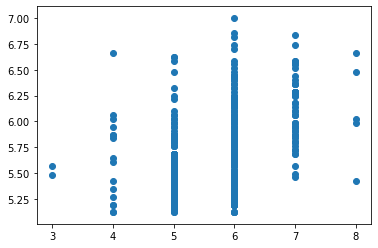

In [236]:
plt.scatter(x=tsty, y=lr_pred)
print(np.correlate(tsty, lr_pred))

In [220]:
from sklearn import metrics
print("RSME: " , np.sqrt(metrics.mean_squared_error(lr_pred, tsty)))
print("R2: ", metrics.r2_score(tsty, lr_pred))

RSME:  0.6503511121866131
R2:  0.3310001542879998


[15256.83660168]


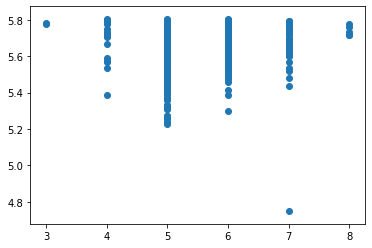

In [231]:
from sklearn.linear_model import Lasso
model_lasso = Lasso()
model_lasso.fit(X=trnx, y=trny)
lr_pred_lasso = model_lasso.predict(X=tstx)
plt.scatter(x=tsty, y=lr_pred_lasso)
print(np.correlate(tsty, lr_pred_lasso))

In [232]:
from sklearn import metrics
print("RSME: " , np.sqrt(metrics.mean_squared_error(lr_pred_lasso, tsty)))
print("R2:" , metrics.r2_score(tsty, lr_pred_lasso))

RSME:  0.7853163123164475
R2: 0.024517505533790063


RSME:  0.6503909881080069


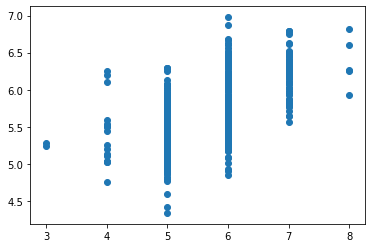

In [227]:
from sklearn.linear_model import Ridge
model_ridge = Ridge()
model_ridge.fit(X=trnx, y=trny)
lr_pred_ridge = model_ridge.predict(X=tstx)
print("RSME: ", np.sqrt(metrics.mean_squared_error(lr_pred_ridge, tsty)))
plt.scatter(x=tsty, y=lr_pred_ridge)

In [228]:
from sklearn import metrics
print("RSME: " , np.sqrt(metrics.mean_squared_error(lr_pred_ridge, tsty)))
print("R2:" , metrics.r2_score(tsty, lr_pred_ridge))

RSME:  0.6503909881080069
R2: 0.3309181130564174


In [229]:
print(model.coef_, model_lasso.coef_, model_ridge.coef_)

[ 4.71750074e-03 -1.12563719e+00 -1.31651219e-01  2.66135084e-02
 -2.01235877e+00 -1.01888983e-03 -2.51009655e-03 -2.15189889e+01
 -2.93708460e-01  8.96925009e-01  2.71920331e-01] [ 0.         -0.          0.          0.         -0.          0.
 -0.00388889 -0.         -0.          0.          0.        ] [-8.09365294e-03 -1.15546769e+00 -1.58085095e-01  1.60841824e-02
 -1.30732444e+00 -9.14352072e-04 -2.42969869e-03 -1.68805972e-02
 -3.15856614e-01  7.63728021e-01  2.99840555e-01]


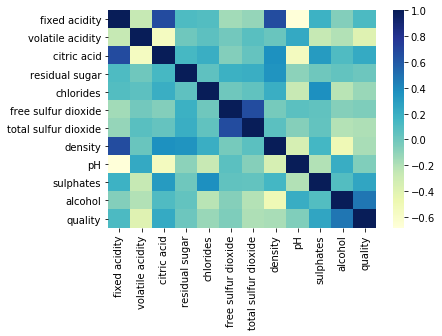

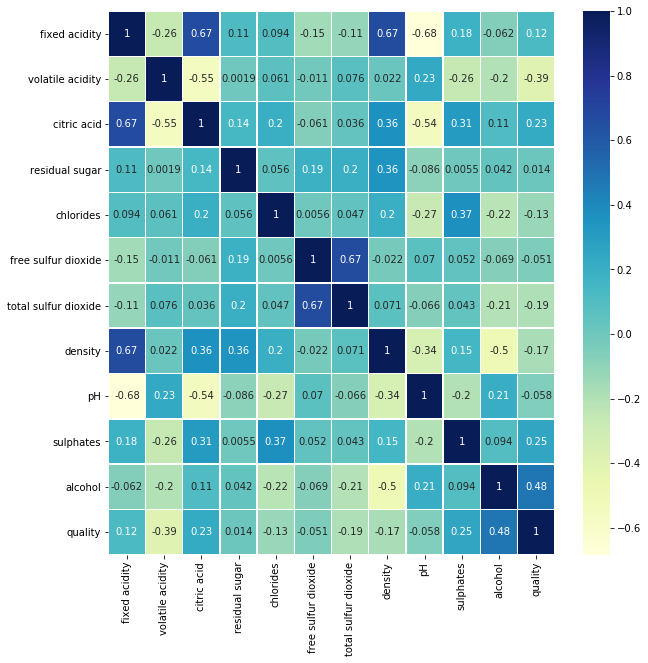

In [230]:
import seaborn as sns
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
import statsmodels.formula.api as sm
from sklearn.linear_model import LinearRegression
corr_matrix = df.corr(method = 'pearson')
sns.heatmap(corr_matrix,cmap="YlGnBu")
fig, ax = plt.subplots(figsize=(10,10))
sns.heatmap(corr_matrix,cmap="YlGnBu", annot=True, linewidths=.5, ax = ax)